In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

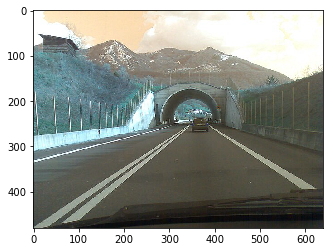

In [13]:
image = cv2.imread('road3.jpg')
plt.imshow(image)

In [14]:
def canny(image):
    #lane_image = np.copy(image)
    gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(gray,(5,5),0)
    canny = cv2.Canny(blur,50,200)
    return canny

In [38]:
def region_of_intrest(image):
    height = image.shape[0]
    #height = 160
    polygon = np.array([
        [(0,height) , (640,420) ,(400,200)]
                       ])
    mask = np.zeros_like(image)
    cv2.fillPoly(mask,polygon,255)
    masked_image = cv2.bitwise_and(image,mask)
    return masked_image

In [25]:
def display_lines(image ,lines):
    line_image = np.zeros_like(image)
    if lines is not None:
        for line in lines:
            x1,y1,x2,y2 = line.reshape(4)
            cv2.line(line_image , (x1,y1) ,(x2,y2), (255,0,0) ,10)
    return line_image

In [26]:
def make_coordinates(image , line_parameters):
    slope,intercept = line_parameters
    y1 = image.shape[0]
    y2 = int(y1*(3/5))
    x1 = int((y1 - intercept)/slope)
    x2 = int((y2 - intercept)/slope)
    return np.array([x1,y1,x2,y2])

In [27]:
def average_slope_intercept(image , lines):
    left_fit=[]
    right_fit=[]
    for line in lines:
        x1,x2,y1,y2 = line.reshape(4)
        parameters = np.polyfit((x1,x2),(y1,y2),1)
        slope = parameters[0]
        intercept=parameters[1]
        if slope<0:
            left_fit.append((slope,intercept))
        else:
            right_fit.append((slope,intercept))
    left_fit_average = np.average(left_fit,axis=0)
    right_fit_average = np.average(left_fit,axis=0)
    left_line = make_coordinates(image , left_fit_average)
    right_line = make_coordinates(image,right_fit_average)
    return np.array([left_line,right_line])

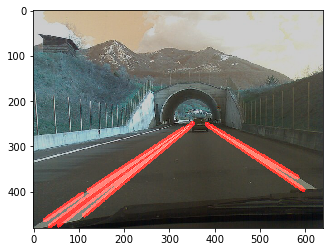

In [39]:

lane_image = np.copy(image)
cany = canny(lane_image)
#plt.imshow(cany)
#cany.type
cropped_image = region_of_intrest(cany)
#result = region_of_intrest(cany)
lines = cv2.HoughLinesP(cropped_image , 2, np.pi/180 , 100 ,np.array([]) , minLineLength=40 , maxLineGap=5)

#averaged_lines = average_slope_intercept(lane_image,lines)
line_image = display_lines(lane_image , lines)
combo_image = cv2.addWeighted(lane_image , 0.8 ,line_image ,1 ,1)
plt.imshow(combo_image,cmap='gray')